In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# set a stylesheet
plt.style.use('ggplot')

# natural language toolkit
import nltk

In [3]:
# read in the data
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [4]:
# there is a lot of data, shape it down a bit
df = df.head(500)

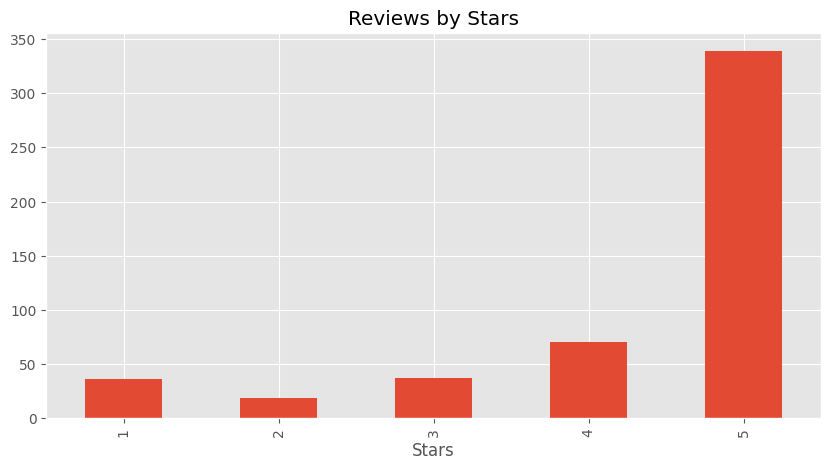

In [5]:
plot = df['Score'].value_counts().sort_index().plot(kind='bar', title='Reviews by Stars', figsize=(10,5))
plot.set_xlabel('Stars')
plt.show()

In [6]:
test_ex = df['Text'][50]
print(test_ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [7]:
# nltk can split the data into parts and tokenize it
